# CNN

## Classification with CNN – Handwritten Digits Recognition (MNIST)

In [32]:
import keras, tensorflow
from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers import Dense 
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, CSVLogger, ModelCheckpoint

import matplotlib.pyplot as plt 

# 

In [2]:
# For CNN 
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout
#


# Paramenters

In [26]:
img_row, img_col = 28, 28

INPUT_SHAPE = (img_row, img_col, 1) # 1x for 1x Layer of grey scaled
NUM_CLASS = 10 # 0 bis 9 
EPOCHS = 1


# Load data



In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Prepare Data

In [5]:
# Reshaping
x_train = x_train.reshape(x_train.shape[0], img_row, img_col, 1)  # i need 2D not 1D
x_test = x_test.reshape(x_test.shape[0], img_row, img_col, 1)

# Data Type
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

# Scaling the grey values from 0-255 ---> 0-1
x_train /= 255
x_test /= 255


In [6]:
# One-hot Encoding

y_train = tensorflow.keras.utils.to_categorical(y_train, NUM_CLASS)
y_test = tensorflow.keras.utils.to_categorical(y_test, NUM_CLASS)

In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


# Build the Model

In [8]:
model = Sequential()

model.add(Conv2D (24, kernel_size=(5,5), strides = (1,1), padding = "same", activation ="relu", input_shape = INPUT_SHAPE ))
model.add(MaxPooling2D(pool_size=(2,2) , strides = (2,2)  ))

model.add(Conv2D(48, kernel_size=(3,3), strides = (1,1), padding = "same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2) , strides = (2,2)  ))

model.add(Flatten())

# Hidden Layer(s)
model.add(Dense(256, activation = "relu"))

# Drop Out Layer  --> sets some weights and neuros to zero randomly
model.add(Dropout(0.2))

# Output layer
model.add(Dense(NUM_CLASS, activation = "softmax"))




In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 24)        624       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 48)        10416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 48)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2352)              0         
                                                                 
 dense (Dense)               (None, 256)               6

# Compile / Configure

In [10]:
model.compile(loss = 'categorical_crossentropy', optimizer =RMSprop(), metrics =[ 'accuracy'])


# Training

In [33]:
# Advanced: list of callback instances
# ACHTUNG: the code of the MyCustomCallback is DOWN ...Scroll to there and run the code fist
my_callback_list = [EarlyStopping(min_delta= 0.0001, patience = 5),  # early stopping if no improvement for 5 epochs more than 0.0001
                   MyCustomCallback(), # uses my custome call back class
                   CSVLogger('./training.log'),  # logs the result for each epoch in a csv file
                   ModelCheckpoint(filepath='./models/model.{epoch:02d}-{val_loss:.2f}.h5'), # save the model under the name xyz
                    ]

In [34]:
# Normal Fitting
#history = model.fit(x_train, y_train, epochs=EPOCHS, verbose = 0, validation_data = (x_test, y_test))   # validation_data instead of validation_split

# With Callback Earlystopping
#history = model.fit(x_train, y_train, epochs=EPOCHS, verbose = 0, validation_data = (x_test, y_test), callbacks=[EarlyStopping(min_delta= 0.0001, patience = 5)])   # validation_data instead of validation_split


# With a list of Callbacks
history = model.fit(x_train, y_train, epochs=EPOCHS, verbose = 0, validation_data = (x_test, y_test), callbacks= my_callback_list)   # validation_data instead of validation_split


Starting training; got log keys: []
Start epoch 0 of training; got log keys: []
...Training: start of batch 0; got log keys: []
...Training: end of batch 0; got log keys: ['loss', 'accuracy']
...Training: start of batch 1; got log keys: []
...Training: end of batch 1; got log keys: ['loss', 'accuracy']
...Training: start of batch 2; got log keys: []
...Training: end of batch 2; got log keys: ['loss', 'accuracy']
...Training: start of batch 3; got log keys: []
...Training: end of batch 3; got log keys: ['loss', 'accuracy']
...Training: start of batch 4; got log keys: []
...Training: end of batch 4; got log keys: ['loss', 'accuracy']
...Training: start of batch 5; got log keys: []
...Training: end of batch 5; got log keys: ['loss', 'accuracy']
...Training: start of batch 6; got log keys: []
...Training: end of batch 6; got log keys: ['loss', 'accuracy']
...Training: start of batch 7; got log keys: []
...Training: end of batch 7; got log keys: ['loss', 'accuracy']
...Training: start of ba

# Plot The results

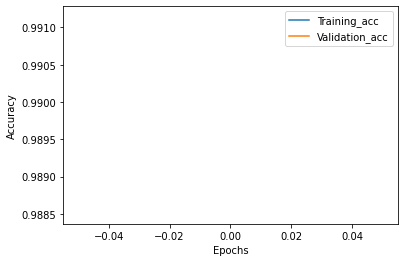

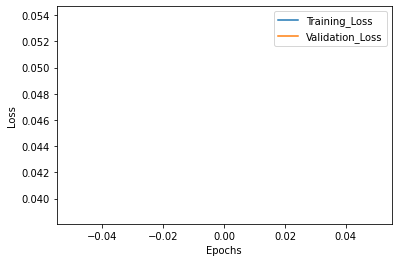

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training_acc", "Validation_acc"])
plt.show()


# Loss 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Training_Loss", "Validation_Loss"])
plt.show()

# Custom Callback
- https://keras.io/guides/writing_your_own_callbacks/

In [18]:
class MyCustomCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        keys = list(logs.keys())
        print("Starting training; got log keys: {}".format(keys))

    def on_train_end(self, logs=None):
        keys = list(logs.keys())
        print("Stop training; got log keys: {}".format(keys))

    def on_epoch_begin(self, epoch, logs=None):
        keys = list(logs.keys())
        print("Start epoch {} of training; got log keys: {}".format(epoch, keys))

    def on_epoch_end(self, epoch, logs=None):
        keys = list(logs.keys())
        print("End epoch {} of training; got log keys: {}".format(epoch, keys))

    def on_test_begin(self, logs=None):
        keys = list(logs.keys())
        print("Start testing; got log keys: {}".format(keys))

    def on_test_end(self, logs=None):
        keys = list(logs.keys())
        print("Stop testing; got log keys: {}".format(keys))

    def on_predict_begin(self, logs=None):
        keys = list(logs.keys())
        print("Start predicting; got log keys: {}".format(keys))

    def on_predict_end(self, logs=None):
        keys = list(logs.keys())
        print("Stop predicting; got log keys: {}".format(keys))

    def on_train_batch_begin(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Training: start of batch {}; got log keys: {}".format(batch, keys))

    def on_train_batch_end(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Training: end of batch {}; got log keys: {}".format(batch, keys))

    def on_test_batch_begin(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Evaluating: start of batch {}; got log keys: {}".format(batch, keys))

    def on_test_batch_end(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Evaluating: end of batch {}; got log keys: {}".format(batch, keys))

    def on_predict_batch_begin(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Predicting: start of batch {}; got log keys: {}".format(batch, keys))

    def on_predict_batch_end(self, batch, logs=None):
        keys = list(logs.keys())